In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sklearn
import warnings
warnings.filterwarnings('ignore')

# <div style="font-family: Cambria; font-weight:bold; letter-spacing:0px; color: #ffffff; font-size:120%; text-align:left; padding:3.0px; background:#0052cc; border-bottom:8px solid #cc9966" > Data Preprocessing <br><div>


* [Introduction](#1)    
* [Data Cleaning](#2)
* [Data Integration](#3)
* [Data Transformation](#4)
* [Feature Selection](#5)
* [Feature Engineering](#6)
* [Data Splitting](#7)

<a id="1"> </a>
# <div class="alert alert-block alert-success" dir="rtl" style="text-align: center;"><strong><span style="font-size: 20pt">Introduction <br /></span></strong></div>

# <img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/08/584692017-PGHD.jpg" />

<div class="alert alert-block alert-info">
    <b> Data preprocessing </b> is an essential step in data analysis and machine learning. It involves transforming raw data into a format that is suitable for further analysis.
    
The steps involved in data preprocessing are as follows:
1. Data Cleaning <br>
2. Data Integration <b>
3. Data Transformation <br>
4. Feature Selection <br>
5. Feature Engineering <br>
6. Data Splitting <br>    
</div>

<a id="2"> </a>
# <div class="alert alert-block alert-success" dir="rtl" style="text-align: center;"><strong><span style="font-size: 20pt">Data Cleaning <br /></span></strong></div>

<font color = "blue"> This step involves handling missing values, duplicate data, and outliers. Missing values can be imputed using techniques like mean, median, or mode. Duplicate data can be removed, and outliers can be either corrected or removed. </font>

<div class="alert alert-block alert-info">

Some methods for handling missing values in a dataset include:
    
<br>
<b> Imputation:</b> Filling in the missing values with estimated or interpolated values based on the existing data.<br>
 <br>   
<b> Dropping observations:</b> Removing the rows or columns with missing values from the dataset.<br>
 <br>  
<b> Categorical imputation:</b> Replacing missing categorical values with the most frequent category or adding a new category to represent missing values.<br>
<br>   
<b>Model-based imputation:</b> Using statistical models to predict missing values based on the patterns observed in the rest of the data.<br>
    
</div>    


## <font color='red'> How can we determine if there are missing values in a dataset? </font>

To determine if there are missing values in a dataset, you can use various methods depending on the programming language or tool you are using. Here are a few common approaches:

1. <b>Descriptive statistics:</b> Calculate summary statistics like mean, median, or count for each column in your dataset. Missing values will be represented as NaN (Not a Number) or NULL. If you see a lower count for a specific column compared to others, it indicates the presence of missing values.
<br>

2. <b>Visualization:</b> Create visualizations like bar plots or heatmaps to identify any patterns or gaps in the data. Missing values may appear as empty spaces or gaps in the plot.
<br>

3. <b>Data profiling:</b> Use data profiling tools or libraries to generate reports on your dataset. These reports often include information about missing values, such as the number and percentage of missing values in each column.
<br>

4. <b>Programming functions:</b> Many programming languages and data analysis libraries provide functions to check for missing values. For example, in Python, you can use functions like `isnull()` or `isna()` from libraries such as Pandas or NumPy.

Remember, handling missing values is an important step in data analysis and can impact the accuracy of your results. It's crucial to decide how to handle missing values based on the context and goals of your analysis.


## Imputation

In [4]:
df = pd.read_csv("Data.csv")
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


## <font color='dodgerblue'> Identifying and handling the missing values</font>

In [5]:
#df.isna().sum()
df.isnull().sum().sort_values(ascending=False)

Age          1
Salary       1
Country      0
Purchased    0
dtype: int64

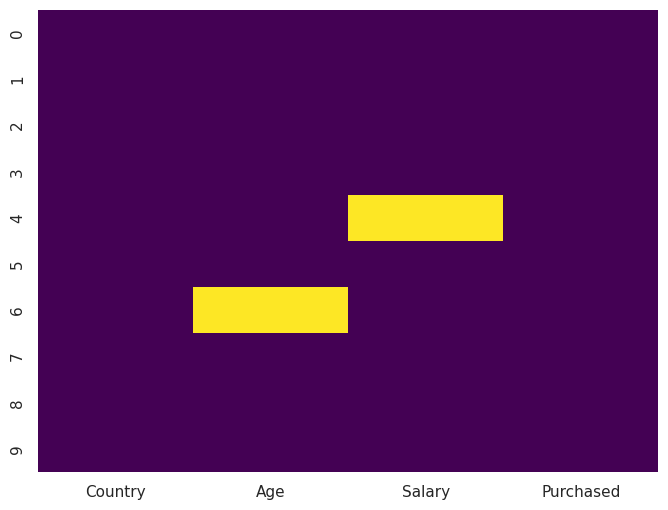

In [6]:
# Visualize missing values using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()

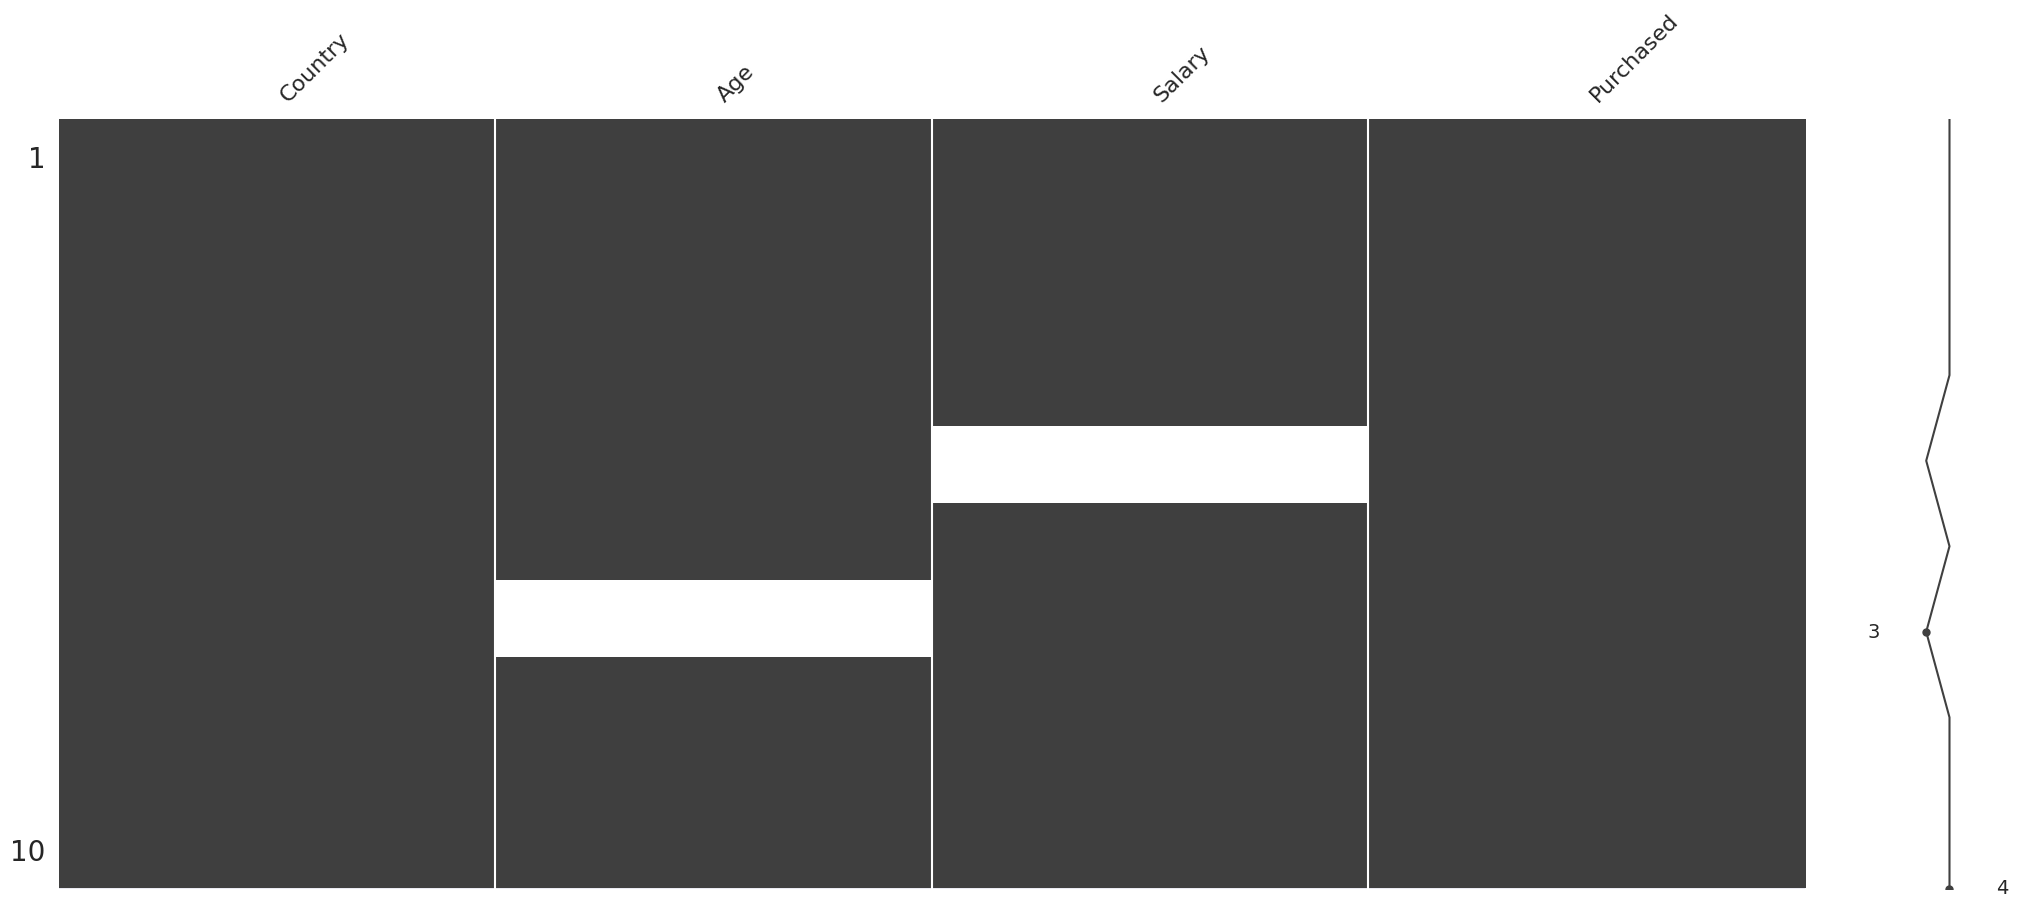

In [7]:
import missingno as msno

# Visualize missing values
msno.matrix(df);

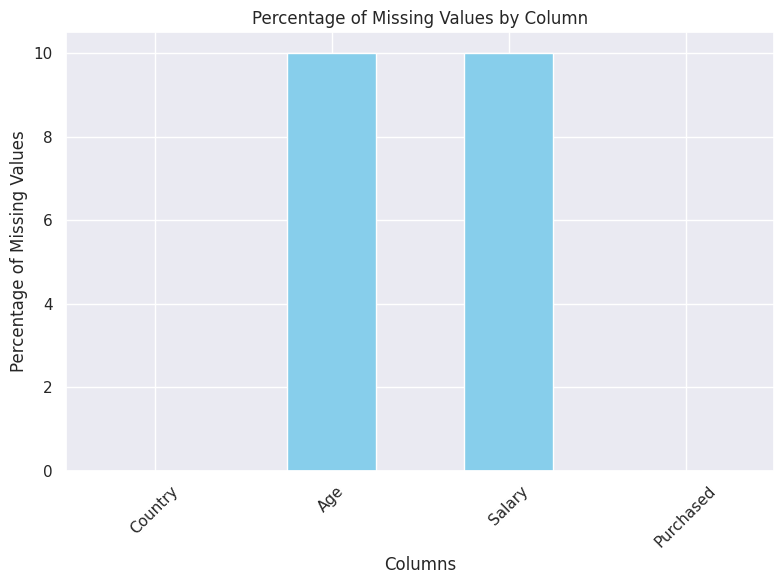

In [8]:
# Calculate percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Plot missing values percentage using a bar plot
plt.figure(figsize=(8, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values by Column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### <font color='darkgreen'>Dropna Method</font>

In [9]:
df1=df.copy()

# summarize the shape of the raw data
print("Before:",df1.shape)

# drop rows with missing values
df1.dropna(inplace=True)

# summarize the shape of the data with missing rows removed
print("After:",df1.shape)

Before: (10, 4)
After: (8, 4)


### <font color='darkgreen'>Fillna Method</font>

In [10]:
df2=df.copy()

# fill missing values with mean column values
df2.fillna(df2[['Age', 'Salary']].mean(), inplace=True)
# count the number of NaN values in each column
df2.isnull().sum()


Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

In [11]:
df2

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


### <font color='darkgreen'>Scikit-Learn</font>


In [12]:
df3=df.copy()

In [13]:
from sklearn.impute import SimpleImputer
numeric_cols = df3.iloc[:, 1:3]

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(numeric_cols)
df3.iloc[:, 1:3] = imputer.transform(numeric_cols)
df3

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [14]:
from sklearn.impute import KNNImputer
numeric_cols = df3.iloc[:, 1:3]

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Fit and transform the imputation
imputed_data = imputer.fit_transform(numeric_cols)

# Replace the imputed values back into the DataFrame
df3.iloc[:, 1:3] = imputed_data

df3

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


## <font color='red'>Duplicate data</font>

<div class="alert alert-block alert-info">
The <b> duplicated() </b> method returns a Series with True and False values that describe which rows in the DataFrame are duplicated and not.
    </div>

In [15]:
df_players = pd.read_csv('Africa Cup of Nations Players.csv')

In [16]:
df_players.duplicated()[712:721]

712    False
713    False
714     True
715    False
716    False
717    False
718     True
719    False
720    False
dtype: bool

In [17]:
df_players.duplicated().sum()

20

In [18]:
df_players[df_players.duplicated()]

,Year,ShirtNumber,PlayerPosition,PlayerName,DateofBirth(age),Caps,Goals,Club,Country
714,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mali
718,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mali
734,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Togo
755,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Congo
804,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zaire
819,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Egypt
826,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Egypt
841,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uganda
845,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uganda
856,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zambia


In [19]:
result = df_players.duplicated(subset=['Year','PlayerName'])
df_players[result].head()

,Year,ShirtNumber,PlayerPosition,PlayerName,DateofBirth(age),Caps,Goals,Club,Country
160,1962,NaN,NaN,Francis Atema,NaN,NaN,NaN,NaN,Uganda
676,1972,NaN,NaN,NaN,(1954-01-30)30 January 1954 (aged 18),NaN,NaN,NaN,Cameroon
682,1972,NaN,NaN,NaN,(1946-06-12)12 June 1946 (aged 25),NaN,NaN,NaN,Cameroon
706,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mali
714,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mali


In [20]:
result = df_players.duplicated(subset=['Year','PlayerName'])
df_players[~result].head()

,Year,ShirtNumber,PlayerPosition,PlayerName,DateofBirth(age),Caps,Goals,Club,Country
0,1957,NaN,GK,Ali Bakr,NaN,NaN,NaN,Zamalek,Egypt
1,1957,NaN,GK,"Paraskos ""Brascos"" Trimeritis",NaN,NaN,NaN,El-Qanah,Egypt
2,1957,NaN,GK,Abdel-Galil Hameida,NaN,NaN,NaN,Al-Ahly,Egypt
3,1957,NaN,DF,Mosaad Daoud,NaN,NaN,NaN,El-Olympi,Egypt
4,1957,NaN,DF,El-Sayed El-Arabi,NaN,NaN,NaN,Teram,Egypt


<font color = "darkblue"> The parameter <b>keep</b> of df.duplicated() works in three manners.

<font color = "darkblue"> If we set it to <b>first</b> when the method searches duplicate rows, the first occurrence in the set of same duplicate rows is not marked as duplicated. It's the default behavior of this method.

<font color = "darkblue"> <b>last</b> do the inverse of the first

<font color = "darkblue">Set keep to <b>False</b> mark all occurrence of rows that is at least two as duplicated without conserving one of them.
</font>

In [21]:
df_players[df_players.duplicated(keep=False)].head()

,Year,ShirtNumber,PlayerPosition,PlayerName,DateofBirth(age),Caps,Goals,Club,Country
706,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mali
714,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mali
718,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mali
729,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Togo
734,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Togo


In [22]:
df_players.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,Year,ShirtNumber,PlayerPosition,PlayerName,DateofBirth(age),Caps,Goals,Club,Country
0,1957,NaN,GK,Ali Bakr,NaN,NaN,NaN,Zamalek,Egypt
1,1957,NaN,GK,"Paraskos ""Brascos"" Trimeritis",NaN,NaN,NaN,El-Qanah,Egypt
2,1957,NaN,GK,Abdel-Galil Hameida,NaN,NaN,NaN,Al-Ahly,Egypt
3,1957,NaN,DF,Mosaad Daoud,NaN,NaN,NaN,El-Olympi,Egypt
4,1957,NaN,DF,El-Sayed El-Arabi,NaN,NaN,NaN,Teram,Egypt
...,...,...,...,...,...,...,...,...,...
7529,2019,19,FW,Joseph Mendes,(1991-03-30)30 March 1991 (aged 28),0,0,Ajaccio,Guinea-Bissau
7530,2019,20,MF,Sori Mané,(1996-04-03)3 April 1996 (aged 23),7,0,Cova da Piedade,Guinea-Bissau
7531,2019,21,DF,Nanú,(1994-05-17)17 May 1994 (aged 25),0,0,Marítimo,Guinea-Bissau
7532,2019,22,DF,Mamadu Candé,(1990-08-29)29 August 1990 (aged 28),14,0,Santa Clara,Guinea-Bissau


* <b>subset</b> is a list of columns to use to determine duplicate rows. By default, this method search duplicate rows with all columns.

* <b>keep</b> work as the same as in df.duplicated(). This parameter determines the occurrence of duplicate rows to keep in the set of same duplicate rows.

* <b>inplace</b>  indicate if we'll work directly in the same instance of dataframe or we'll create a copy to work with it and return the result dataframe.

In [23]:
display('Before drop duplicates: ',df_players.shape)
display('After drop duplicates: ',df_players.drop_duplicates().shape)

'Before drop duplicates: '

(7534, 9)

'After drop duplicates: '

(7514, 9)

## <font color='red'>Outliers</font>

<div class="alert alert-block alert-info">
<b>Outliers</b> in a dataset can be identified by using various statistical methods such as the z-score, the interquartile range (IQR), or visual techniques like box plots. Once identified, outliers can be handled by either removing them from the dataset, transforming the data using mathematical techniques, or applying robust statistical methods that are less influenced by outliers.
    
In statistical analysis, an outlier refers to an observation that significantly deviates from the other observations in a dataset. It is typically an extreme value that is either unusually high or low compared to the rest of the data. Outliers can occur due to various reasons such as measurement errors, data entry mistakes, or genuine rare events.

Identifying outliers is important because they can have a significant impact on statistical analyses and can distort the results. Outliers can affect measures such as the mean and standard deviation, making them less representative of the majority of the data. Therefore, it is crucial to handle outliers appropriately to ensure accurate and reliable statistical analysis.
    </div>

### <font color='darkgreen'>Detecting outliers with Boxplot</font>

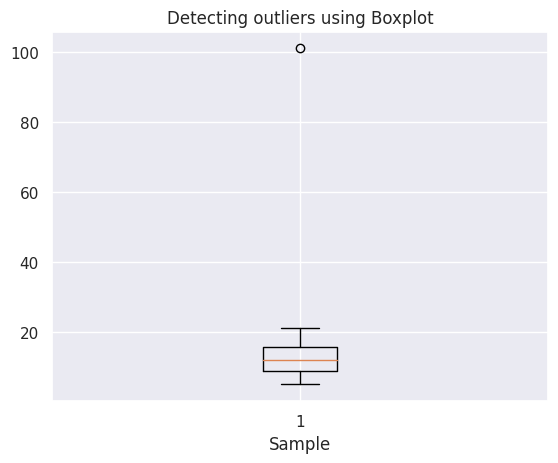

In [24]:
sample= [8, 101, 18, 7, 13, 14, 11, 21, 5, 15, 10, 9]
plt.boxplot(sample, vert=True)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')
plt.show()

### <font color='darkgreen'>Detecting outliers with z-score</font>

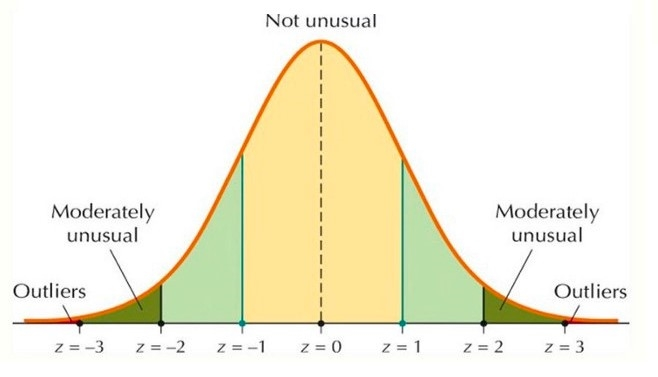

In [25]:
from IPython.display import Image

image_path = 'image 1.jpg'

Image(filename=image_path)

In [26]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(sample)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [101]


### <font color='darkgreen'>Detecting Outliers using the Inter Quantile Range(IQR)</font>

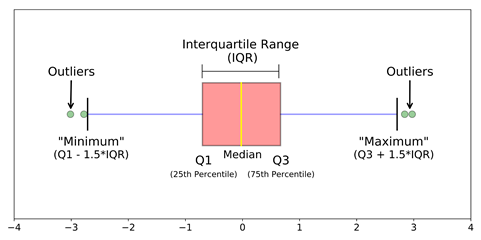

In [27]:
image_path = 'IQR.png'

Image(filename=image_path)

In [28]:
sample= [8, 101, 18, 7, 13, 14, 11, 21, 5, 15, 10, 9]
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(sample)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [101]


## <font color='red'> Handle Outliers </font>

### <font color='darkgreen'>Remove the outliers</font>

In [29]:
for i in sample_outliers:
    a = np.delete(sample, np.where(np.array(sample)==i))
    print(a)
    print('*******'*7)
    print(len(sample), len(a))

[ 8 18  7 13 14 11 21  5 15 10  9]
*************************************************
12 11


### <font color='darkgreen'>Quantile based flooring and capping</font>

Quantile-based flooring and capping is a data transformation technique used to limit low and high values of a dataset. It involves setting a lower bound (floor) and an upper bound (cap) for the values, based on their ranking within the dataset.

In [30]:
# Given sample array
sample = [8, 101, 18, 7, 13, 14, 11, 21, 5, 15, 10, 9]

# Computing 10th and 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(sample, 10).round(2)
ninetieth_percentile = np.percentile(sample, 90).round(2)

b = np.where(sample < tenth_percentile, tenth_percentile, sample)
b = np.where(b > ninetieth_percentile, ninetieth_percentile, b)

# Function to print list-like format with comma separation
def print_list_with_commas(arr):
    print("[", end="")  # Start printing as a list
    for i in range(len(arr)):
        if i < len(arr) - 1:
            print(arr[i], end=", ")
        else:
            print(arr[i], end="")  # No comma after the last element
    print("]")  # End of the list

# Print arrays in list-like format with comma separation
print("Sample:", end=" ")
print_list_with_commas(sample)
print('*******' * 9)
print("New array:", end=" ")
print_list_with_commas(b)


Sample: [8, 101, 18, 7, 13, 14, 11, 21, 5, 15, 10, 9]
***************************************************************
New array: [8.0, 20.7, 18.0, 7.1, 13.0, 14.0, 11.0, 20.7, 7.1, 15.0, 10.0, 9.0]


### <font color='darkgreen'>Mean/Median Imputation</font>

In [31]:
median = np.median(sample)
print('The median of sample data is equal to: ', median)
print('*******' * 8)
# Replace with median
for i in sample_outliers:
    c = np.where(np.array(sample)==i, int(median), sample)
    print("Sample: ", sample)
    print('*******' * 8)
    print("New array: ",c)
    # print(x.dtype)

The median of sample data is equal to:  12.0
********************************************************
Sample:  [8, 101, 18, 7, 13, 14, 11, 21, 5, 15, 10, 9]
********************************************************
New array:  [ 8 12 18  7 13 14 11 21  5 15 10  9]


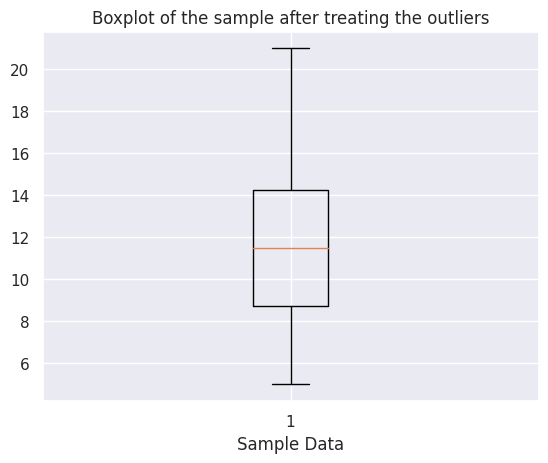

In [32]:
plt.boxplot(c, vert=True)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample Data");

<a id="3"> </a>
# <div class="alert alert-block alert-success" dir="rtl" style="text-align: center;"><strong><span style="font-size: 20pt">Data Integration <br /></span></strong></div>

<div class="alert alert-block alert-info">
<b>Data integration</b> refers to the process of combining data from different sources into a unified view. There are several approaches to data integration, including:

1. **Manual data integration**: This approach involves manually extracting data from different sources and then combining it using tools like spreadsheets or databases. It is a time-consuming and error-prone method, suitable for small-scale integration tasks.

2. **Batch processing**: In this approach, data from different sources is extracted, transformed, and loaded into a data warehouse or a central repository periodically, typically in batches. This method is suitable for scenarios where real-time integration is not required.

3. **Middleware-based integration**: Middleware tools act as intermediaries between different systems, facilitating data exchange and transformation. These tools provide a layer of abstraction and enable seamless communication between systems with different data formats and protocols.

4. **Enterprise Application Integration (EAI)**: EAI focuses on integrating different enterprise applications within an organization. It often involves the use of middleware tools and technologies to enable communication and data exchange between applications.

5. **Data virtualization**: Data virtualization allows users to access and query data from multiple sources without physically integrating them. It provides a virtual layer that abstracts the underlying data sources, making it easier to access and analyze data from various systems.

6. **Extract, Transform, Load (ETL)**: ETL is a common approach used in data warehousing. It involves extracting data from various sources, transforming it to meet the target schema, and then loading it into a data warehouse or a central repository.

7. **Data replication**: In this approach, data from different sources is replicated and stored in a central location. Changes made to the source data are then propagated to the central repository, ensuring data consistency across systems.

Each approach has its advantages and disadvantages, and the choice depends on factors such as data volume, real-time requirements, complexity, and cost considerations.

In [33]:
df1=pd.read_csv('mark.csv')
print('The shape of df1: ', df1.shape)
df2=pd.read_csv('student.csv')
print('The shape of df2: ', df2.shape)

The shape of df1:  (232, 3)
The shape of df2:  (232, 5)


In [34]:
df1.head()

,Student_id,Mark,City
0,1,95,Chennai
1,2,70,Delhi
2,3,98,Mumbai
3,4,75,Pune
4,5,89,Kochi


In [35]:
df2.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


<font color='darkblue'> <b>Student_id</b> is common to both datasets. Perform data integration on both the DataFrames with respect to the Student_id column using the <b>pd.merge()</b> function.</font>


In [36]:
df_combined = pd.merge(df1, df2, on = 'Student_id')
df_combined.head()

,Student_id,Mark,City,Age,Gender,Grade,Employed
0,1,95,Chennai,19,Male,1st Class,yes
1,2,70,Delhi,20,Female,2nd Class,no
2,3,98,Mumbai,18,Male,1st Class,no
3,4,75,Pune,21,Female,2nd Class,no
4,5,89,Kochi,19,Male,1st Class,no


<a id="4"> </a>
# <div class="alert alert-block alert-success" dir="rtl" style="text-align: center;"><strong><span style="font-size: 20pt">Data Transformation<br /></span></strong></div>

<div class="alert alert-block alert-info">
    
As we know, the data is classified into **Categorical** and **Numerical** data.
    
* Numerical data is further divided into the **Discrete** and **Continuous** types.
    
* Categorical data is further divided into the **Ordered** and **Nominal** types.    

Some common data transformation techniques used in machine learning are:

**Scaling:** Standardizing or normalizing the features of the dataset to a common scale.

**Encoding:** Transforming categorical variables into numerical representations.
    
</div>

## <font color='red'>Encoding the categorical data</font>
Categorical data refers to the information that has specific categories within the dataset. In the dataset cited above, there are two categorical variables – country and purchased.

Machine Learning models are primarily based on mathematical equations. Thus, you can intuitively understand that keeping the categorical data in the equation will cause certain issues since you would only need numbers in the equations.

### <font color='darkgreen'>ColumnTransformer</font>

<b>ColumnTransformer</b> is a class in scikit-learn library that allows you to apply different transformations to different columns in your dataset. It works by specifying which columns should be transformed, the transformation to apply to each column, and whether to keep or drop the original column.

In [37]:
df = pd.read_csv("Data.csv")

df4=df.copy()

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify non-numeric columns for encoding
non_numeric_cols = df4.select_dtypes(exclude=['number']).columns.tolist()

# Create a transformer list for numeric and non-numeric columns
transformers = [
    ('encoder', OneHotEncoder(), non_numeric_cols),
    ('passthrough', 'passthrough', df4.select_dtypes(include=['number']).columns.tolist())
]

# Apply ColumnTransformer
ct = ColumnTransformer(transformers=transformers)
df4_encoded = np.array(ct.fit_transform(df4))

df4_encoded



array([[1.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 4.4e+01, 7.2e+04],
       [0.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 1.0e+00, 2.7e+01, 4.8e+04],
       [0.0e+00, 1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 3.0e+01, 5.4e+04],
       [0.0e+00, 0.0e+00, 1.0e+00, 1.0e+00, 0.0e+00, 3.8e+01, 6.1e+04],
       [0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 4.0e+01,     nan],
       [1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 3.5e+01, 5.8e+04],
       [0.0e+00, 0.0e+00, 1.0e+00, 1.0e+00, 0.0e+00,     nan, 5.2e+04],
       [1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 4.8e+01, 7.9e+04],
       [0.0e+00, 1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 5.0e+01, 8.3e+04],
       [1.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 3.7e+01, 6.7e+04]])

### <font color='darkgreen'> pd.get_dummies()</font>

In [39]:
df5=df.copy()
df5=pd.get_dummies(df5 , dtype=float)
df5

,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes
0,44.0,72000.0,1.0,0.0,0.0,1.0,0.0
1,27.0,48000.0,0.0,0.0,1.0,0.0,1.0
2,30.0,54000.0,0.0,1.0,0.0,1.0,0.0
3,38.0,61000.0,0.0,0.0,1.0,1.0,0.0
4,40.0,NaN,0.0,1.0,0.0,0.0,1.0
5,35.0,58000.0,1.0,0.0,0.0,0.0,1.0
6,NaN,52000.0,0.0,0.0,1.0,1.0,0.0
7,48.0,79000.0,1.0,0.0,0.0,0.0,1.0
8,50.0,83000.0,0.0,1.0,0.0,1.0,0.0
9,37.0,67000.0,1.0,0.0,0.0,0.0,1.0


### <font color='darkgreen'> LabelEncoder</font>

<b>LabelEncoder</b> is a class in the scikit-learn library, which is commonly used to convert categorical data into numerical labels. It is often used in machine learning tasks where the algorithms require numerical inputs.

The process of converting categorical data into numerical labels involves the following steps:

1. Import the `LabelEncoder` class from the scikit-learn library.
2. Create an instance of the LabelEncoder class.
3. Fit the LabelEncoder to the categorical data by calling the `fit` method and passing the categorical data as an argument.
4. Transform the categorical data into numerical labels by calling the `transform` method and passing the categorical data as an argument.
5. The transformed data will now have numerical labels instead of the original categorical values.

For example, let's say you have a categorical feature called "color" with three unique categories: "red", "blue", and "green". After applying LabelEncoder, "red" might be encoded as 0, "blue" as 1, and "green" as 2.

It's important to note that LabelEncoder assigns labels in an arbitrary manner and doesn't take into account any inherent order or relationship between the categories. If there is an ordinal relationship between the categories, you might consider using other encoding techniques such as OrdinalEncoder or OneHotEncoder.

`LabelEncoder` is a simple and efficient way to convert categorical data into numerical labels, making it easier for machine learning algorithms to process and analyze the data.

In [40]:
df6=df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df6['Purchased']=le.fit_transform(df6['Purchased'])
df6

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,0
1,Spain,27.0,48000.0,1
2,Germany,30.0,54000.0,0
3,Spain,38.0,61000.0,0
4,Germany,40.0,NaN,1
5,France,35.0,58000.0,1
6,Spain,NaN,52000.0,0
7,France,48.0,79000.0,1
8,Germany,50.0,83000.0,0
9,France,37.0,67000.0,1


## <font color='red'> Data in Different Scales</font>

In [41]:
df=pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [42]:
df.isna().sum().sort_values(ascending=False)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [44]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### <font color='darkgreen'> Standard Scaler Method</font>

The `StandardScaler` method in machine learning is used for standardizing features by removing the mean and scaling to unit variance. This process is essential for many machine learning algorithms that assume that all features are centered around zero and have variance in the same order.

The `StandardScaler` method calculates the mean and standard deviation of each feature and then scales the feature values accordingly. This ensures that the features have a mean of 0 and a standard deviation of 1, making them suitable for algorithms that require standardized input.

When using the `StandardScaler` method, each feature is independently scaled, which helps maintain the relative relationships between feature values. This method is commonly used as a preprocessing step in machine learning pipelines to improve the performance and convergence of models.

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


### <font color='darkgreen'> MinMax Scaler Method</font>

The `MinMaxScaler` method is a data normalization technique commonly used in machine learning and data preprocessing. It works by scaling and transforming the features of a dataset to a specific range, typically between 0 and 1.

The formula for Min-Max scaling is:
$$  X_{\text{normalized}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}  $$

Where:
- \( X \) is the original feature value
- \( $X_{\text{min}}$ \) is the minimum value of the feature
- \( $X_{\text{max}}$ \) is the maximum value of the feature

This method is particularly useful when the features have different scales and need to be on a similar scale for machine learning algorithms to work effectively. By using MinMaxScaler, the relative relationships between the features are preserved while ensuring that they are all within the same scale.

In summary, `MinMaxScaler` rescales each feature to a specific range, making it a valuable tool for preprocessing data in machine learning applications.

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


## <font color='red'> Data Discretization</font>

**Data discretization** methods are used to transform continuous data into discrete intervals or categories. There are several types of data discretization methods, including:

1. **Equal Width Binning:** This method divides the range of values into a specified number of bins of equal width.
<br>

2. **Equal Frequency Binning:** In this method, the data is divided into bins such that each bin contains approximately the same number of data points.
<br>

3. **Clustering-based Discretization:** This method involves using clustering algorithms to group similar data points into the same bin.
<br>

4. **Entropy-based Discretization:** Entropy-based methods use information theory concepts to find the best split points for discretizing continuous data.
<br>

5. **Decision Tree Discretization:** Decision tree algorithms can be used to identify the best split points for discretizing continuous attributes based on their predictive power.
<br>

6. **Histogram Analysis:** This method involves analyzing the frequency distribution of the data to determine the boundaries of the discrete intervals.

These methods offer different approaches to discretizing data, each with its own advantages and limitations, and can be chosen based on the specific characteristics of the dataset and the requirements of the analysis.

In [47]:
data=pd.read_csv('Student_bucketing.csv')
data.head()

,Student_id,Age,Grade,Employed,marks
0,1,19,1st Class,yes,29
1,2,20,2nd Class,no,41
2,3,18,1st Class,no,57
3,4,21,2nd Class,no,29
4,5,19,1st Class,no,57


In [48]:
data1=data.copy()
data1['bucket']=pd.cut(data1['marks'],5,labels=['Poor','Below_average','Average','Above_Average','Excellent'])
data1.head()

,Student_id,Age,Grade,Employed,marks,bucket
0,1,19,1st Class,yes,29,Poor
1,2,20,2nd Class,no,41,Below_average
2,3,18,1st Class,no,57,Average
3,4,21,2nd Class,no,29,Poor
4,5,19,1st Class,no,57,Average


### <font color='darkgreen'> Equal–width discretization</font>

the variable values are sorted into intervals of the same
width. The number of intervals is decided arbitrarily and the width is determined by the
range of values of the variable and the number of bins to create, so for the variable X, the
interval width is given as follows:


$$  Width = \frac{{\text{Max} \; X} -{\text{Min}\; X}} {\text{Bins}}  $$

**Equal-width discretization** consists of dividing the range of continuous values into **k** equally sized intervals. Then, if the values of the variable vary between 0 and 100, the bins can be 0–20, 20–40, 40–60, 80–100.

In [49]:
df=data.sort_values(by='marks')

variables = [ 'marks']


In [50]:
!pip install feature-engine

In [51]:
from feature_engine.discretisation import EqualWidthDiscretiser
disc = EqualWidthDiscretiser(bins=8, variables=variables, return_boundaries=True)
disc.fit(df)
bin_t = disc.transform(df)
bin_t

,Student_id,Age,Grade,Employed,marks
47,48,21,2nd Class,yes,"(-inf, 29.75]"
54,55,20,2nd Class,no,"(-inf, 29.75]"
63,64,20,2nd Class,yes,"(-inf, 29.75]"
112,113,20,2nd Class,no,"(-inf, 29.75]"
229,230,20,3rd Class,yes,"(-inf, 29.75]"
...,...,...,...,...,...
220,221,18,3rd Class,no,"(88.25, inf]"
116,117,19,1st Class,yes,"(88.25, inf]"
15,16,19,2nd Class,no,"(88.25, inf]"
137,138,19,2nd Class,no,"(88.25, inf]"


### <font color='darkgreen'> Equal–width discretization</font>

**Equal-frequency discretization** sorts the continuous variable into intervals with the same number of observations. The interval width is determined by quantiles. Equal-frequency discretization is particularly useful for skewed variables, as it spreads the observations over the different bins equally.

In [52]:
from sklearn.preprocessing import KBinsDiscretizer

disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
disc.fit(df[variables])
bin_t = df.copy()
bin_t[variables] = disc.transform(df[variables])
bin_t

,Student_id,Age,Grade,Employed,marks
47,48,21,2nd Class,yes,0.0
54,55,20,2nd Class,no,0.0
63,64,20,2nd Class,yes,0.0
112,113,20,2nd Class,no,0.0
229,230,20,3rd Class,yes,0.0
...,...,...,...,...,...
220,221,18,3rd Class,no,9.0
116,117,19,1st Class,yes,9.0
15,16,19,2nd Class,no,9.0
137,138,19,2nd Class,no,9.0
